En este notebook se realiza el análisis exploratorio de los datos para tener mayor conocimiento de los datos y posibles líneas de investigación sobre los mismos para extraer información relevante sobre jugadores de futbol de las ligas europeas durante el año 2020

In [6]:
# Importación de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Cargue de datos
data = pd.read_csv("https://raw.githubusercontent.com/davidcastri/Cluster_Football/main/Data/transfermarkt_fbref_201920.csv",delimiter=';')

Descripcion de las variables

https://github.com/RSKriegs/Modelling-Football-Players-Values-on-Transfer-Market-and-Their-Determinants-using-Robust-Regression/blob/main/data/columns_description.pdf

In [5]:
data.shape

(2644, 400)

In [ ]:
data.describe(include="all").T

count unique            top  freq         mean         std  \
Column1       2644.0    NaN            NaN   NaN  1363.432678  789.855596   
player          2644   2520  Adama TraorĂ©     3          NaN         NaN   
nationality     2644    102         es ESP   396          NaN         NaN   
position        2644     10             DF   852          NaN         NaN   
squad           2644     98       Cagliari    33          NaN         NaN   
...              ...    ...            ...   ...          ...         ...   
Attendance      2644     98          10728    33          NaN         NaN   
CL            2644.0    NaN            NaN   NaN     0.181165    0.385228   
WinCL         2644.0    NaN            NaN   NaN     0.009077    0.094859   
CLBestScorer  2232.0    NaN            NaN   NaN     0.000448    0.021167   
Season          2644      1        201920#  2644          NaN         NaN   

              min     25%     50%      75%     max  
Column1       0.0  680.75  1362.5  2047.25  2731.0  
player        NaN     NaN     NaN      NaN     NaN  
nationality   NaN     NaN     NaN      NaN     NaN  
position      NaN     NaN     NaN      NaN     NaN  
squad         NaN     NaN     NaN      NaN     NaN  
...           ...     ...     ...      ...     ...  
Attendance    NaN     NaN     NaN      NaN     NaN  
CL            0.0     0.0     0.0      0.0     1.0  
WinCL         0.0     0.0     0.0      0.0     1.0  
CLBestScorer  0.0     0.0     0.0      0.0     1.0  
Season        NaN     NaN     NaN      NaN     NaN  

[400 rows x 11 columns]

In [7]:
# Separación de variables segun su tipo
data_cat = data.select_dtypes(include=['object'])
data_num = data.select_dtypes(exclude=['object'])

In [8]:
data_cat.head()

player nationality position    squad  \
0  Martin Aguirregabiria      es ESP       DF  AlavĂ©s   
1           Oliver Burke     sco SCO    MF,FW  AlavĂ©s   
2       VĂ­ctor Camarasa      es ESP       MF  AlavĂ©s   
3          RubĂ©n Duarte      es ESP       DF  AlavĂ©s   
4            Rodrigo Ely      br BRA       DF  AlavĂ©s   

                       position2   foot   league Attendance   Season  
0          Defender - Right-Back  right  La Liga     12,177  201920#  
1         Forward - Right Winger  right  La Liga     12,177  201920#  
2  Midfielder - Central Midfield  right  La Liga     12,177  201920#  
3           Defender - Left-Back   left  La Liga     12,177  201920#  
4         Defender - Centre-Back  right  La Liga     12,177  201920#

In [9]:
data_num.head()

Column1  age  birth_year    value  height  games  games_starts  minutes  \
0       21   23        1996  4000000     178     31            23     2099   
1      390   22        1997  4000000     188     31            14     1429   
2      430   25        1994  4000000     183     17            15     1293   
3      737   23        1995  4000000     172     31            30     2663   
4      770   25        1993  1000000     188     25            24     2121   

   goals  assists  ...  GDiff  Pts  Pts/G    xG   xGA  xGDiff  xGDiff/90  CL  \
0      1        1  ...    -25   39   1.03  37.0  53.2   -16.2      -0.43   0   
1      1        2  ...    -25   39   1.03  37.0  53.2   -16.2      -0.43   0   
2      0        1  ...    -25   39   1.03  37.0  53.2   -16.2      -0.43   0   
3      0        1  ...    -25   39   1.03  37.0  53.2   -16.2      -0.43   0   
4      2        0  ...    -25   39   1.03  37.0  53.2   -16.2      -0.43   0   

   WinCL  CLBestScorer  
0      0           0.0  
1      0           0.0  
2      0           0.0  
3      0           0.0  
4      0           0.0  

[5 rows x 391 columns]

In [ ]:
_deepnote_run_altair(data_cat, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":true},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"nationality","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"COUNT(*)","type":"quantitative","sort":null,"aggregate":"count","scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [10]:
# Analisis de correlación de variables
corr = pd.Series(abs(data.corr()['value']) > 0.4)
corr_cols = corr.index[corr].tolist()
corr_cols.remove('value')

In [ ]:
# Columnas con alta correlación
corr_cols

['games',
 'games_starts',
 'minutes',
 'goals',
 'assists',
 'xg',
 'npxg',
 'xa',
 'minutes_90s',
 'shots_total',
 'shots_on_target',
 'passes_completed',
 'passes',
 'passes_total_distance',
 'passes_completed_short',
 'passes_short',
 'passes_completed_medium',
 'passes_medium',
 'assisted_shots',
 'passes_into_final_third',
 'passes_into_penalty_area',
 'progressive_passes',
 'passes_live',
 'through_balls',
 'passes_pressure',
 'passes_switches',
 'passes_ground',
 'passes_low',
 'passes_right_foot',
 'passes_intercepted',
 'passes_blocked',
 'sca',
 'sca_passes_live',
 'sca_dribbles',
 'sca_shots',
 'sca_fouled',
 'gca',
 'gca_passes_live',
 'gca_dribbles',
 'tackles_att_3rd',
 'pressures',
 'pressure_regains',
 'pressures_att_3rd',
 'touches',
 'touches_mid_3rd',
 'touches_att_3rd',
 'touches_att_pen_area',
 'touches_live_ball',
 'dribbles_completed',
 'dribbles',
 'players_dribbled_past',
 'carries',
 'carry_distance',
 'carry_progressive_distance',
 'pass_targets',
 'passes_r

<AxesSubplot:>

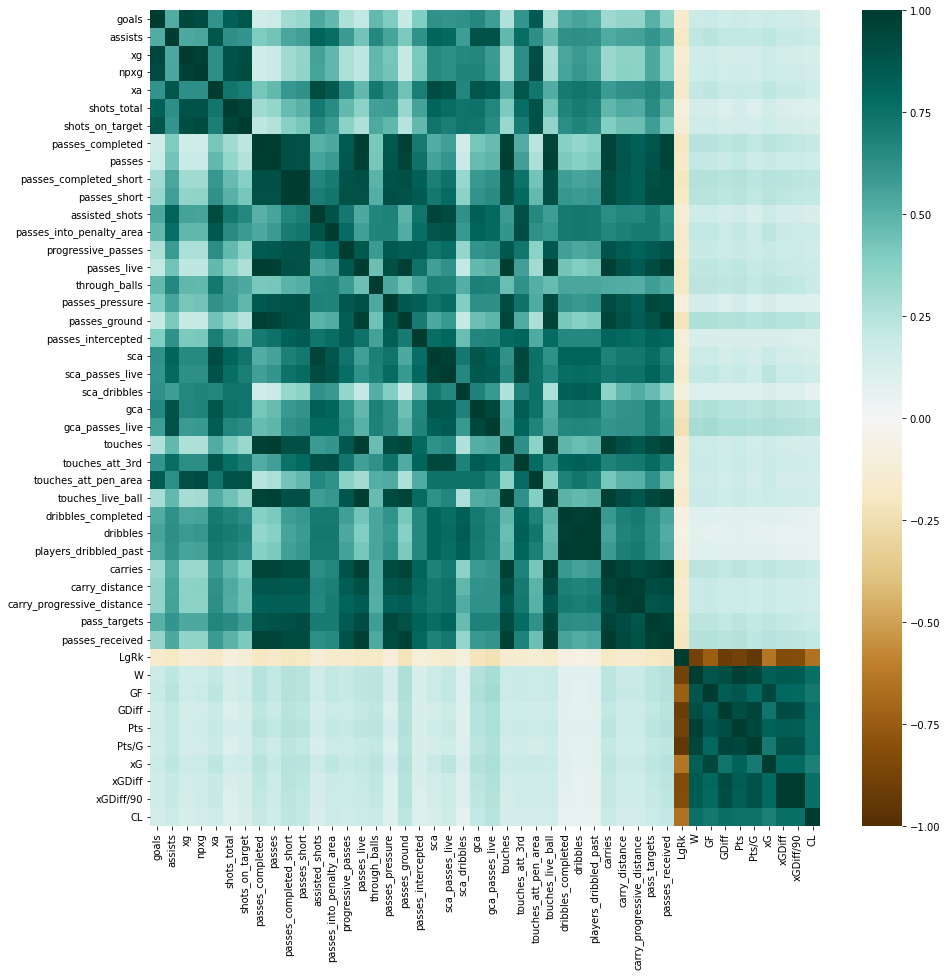

In [11]:
# Heat Map de correlaciones
plt.figure(figsize=(15,15))
sns.heatmap(data_num[corr_cols].corr(),vmin=-1, vmax=1, cmap='BrBG')

In [74]:
# Identificación de valores vacios
a = data_num.count()<2644
data_num.columns[a]

Index(['CLBestScorer'], dtype='object')

<Figure size 720x720 with 0 Axes>

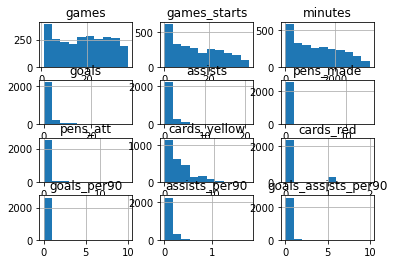

<Figure size 720x720 with 0 Axes>

In [76]:
# Distribución de primeras variables
data_num.iloc[:,5:17].hist()
plt.figure(figsize=(10,10))

In [37]:
# Estandarización de valores para aplicación de PCA
data_scal = StandardScaler().fit_transform(data_num.drop(["CLBestScorer"], axis=1))
#data_PCA = PCA(n_components = 20,).fit(data_scal)
#data_red = data_PCA.transform(data_scal)

In [77]:
# Calculo de PCA mediante eigenvalues
S = pd.DataFrame(data_scal).cov()
eig_val, eig_vec = np.linalg.eig(S)
eig_val

array([ 6.25721355e+01+0.00000000e+00j,  4.76649077e+01+0.00000000e+00j,
        3.63754917e+01+0.00000000e+00j,  2.56745898e+01+0.00000000e+00j,
        1.55045380e+01+0.00000000e+00j,  1.30669952e+01+0.00000000e+00j,
        1.04810344e+01+0.00000000e+00j,  1.00050969e+01+0.00000000e+00j,
        8.15014576e+00+0.00000000e+00j,  6.03865312e+00+0.00000000e+00j,
        5.37580741e+00+0.00000000e+00j,  5.41219175e+00+0.00000000e+00j,
        5.23131535e+00+0.00000000e+00j,  4.22135606e+00+0.00000000e+00j,
        4.24663850e+00+0.00000000e+00j,  3.86387476e+00+0.00000000e+00j,
        3.71697411e+00+0.00000000e+00j,  3.29204178e+00+0.00000000e+00j,
        2.96114576e+00+0.00000000e+00j,  2.88283498e+00+0.00000000e+00j,
        2.86352191e+00+0.00000000e+00j,  2.59272515e+00+0.00000000e+00j,
        2.55702364e+00+0.00000000e+00j,  2.47449040e+00+0.00000000e+00j,
        2.44189971e+00+0.00000000e+00j,  2.37761879e+00+0.00000000e+00j,
        2.34204966e+00+0.00000000e+00j,  2.22512115

/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<AxesSubplot:>

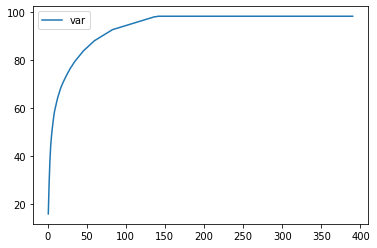

In [44]:
# Explicación de variación por componentes
var = np.around((eig_val/sum(eig_val))*100,1).cumsum()
ind = range(1,len(var)+1)
var_pca = pd.DataFrame({"var":var},ind)
var_pca.plot.line()

In [51]:
# Variación acumulada en los primeros componentes
var[70].sum()

(90.40000000000002+0j)

In [60]:
# Pesos de variable por Componente
pesos_vec  = eig_vec[0:70].T
pesos = pd.DataFrame(pesos_vec,index=data_num.drop(["CLBestScorer"],axis=1).columns)
pesos.style.apply(lambda x: ["background: green" if v in x.abs().sort_values(ascending=False)[0:5].values else "" for v in x.abs()], axis = 0)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=28b7948b-1765-4ec7-a343-4f13d0f01e54' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>